<a href="https://colab.research.google.com/github/hnouraei/Projects/blob/main/HFpEF_ML_prev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Imports

In [ ]:
pip install --upgrade kmodes

In [ ]:
# imports
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime
import string
import pandas_profiling

# clustering models
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph

from kmodes.kprototypes import KPrototypes

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option('display.max_rows', None)
sns.set(style="ticks", color_codes=True)
%matplotlib inline

#connecting to Google Drive to import files
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
cd '/content/drive/My Drive/data/'

/content/drive/My Drive/data


In [ ]:
df = pd.read_csv('HFpEF Data Nov 15 Final.csv')

In [ ]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed:')))]
# Remove lines at the bottom of CSV
df = df[df['ID'].notnull()]
# lower strings
ls = lambda x: x.lower() if type(x) == str else x
df2 = df.applymap(ls)
null_df = pd.notnull(df2)

In [ ]:
df2.head()

,ID,Age,Sex,Ethnicity,CAD,STMI,NSTMI,PCI - INCOMPLETE,HTN,DLD,DM,CKD,A fib,Lung Dz,TIA/stroke,OSA,Block,Pacemaker,HYPOTHYROIDISM,CMP,HCM,Other disease,SBP (mmHg),DBP,HR (BPM),ASA,Anti-plt,DOAC,Warfarin,BB,CCB,ACEi,ARB,MRA,Statin,LASIX,OTHER DIURETIC,SYNTHROID,PPI,ALLOPURINOL,PUFFER,Other Meds,METFORMIN,INSULIN,OTHER DM Meds,Cr,Na,K,BNP,Chol,HDL,LDL,A1C,BMI,HFpEF (%),Filling Pressure,Diastolic Dysfunction,MR,MS,TR,TS,AS,AR,PR,PS,IVSd (6-10) mm,LVPWd (6-10) mm,LVIDd index (22-30) mm/m^2,LVIDs (25-40) mm,LV Mass index (49-115) g/m^2,LV RWT (<0.43),LVOT diam mm,SV LVOT,LV EDV index,LV ESDV index,MV Peak E cm/s,MV Peak A (cm/s),Decel Time msec,MV E/A Ratio,Lateral e' cm/s,Septal e' cm/s,Ave E/e' Ratio,Left Atrium (30-40) mm,LA Vol index (16-34) ml/m^2,RVd A4C (25-41) mm,TV (S') cm/s (>9),RV S' (≥10) cm/s,PLAX RVOT DIA,TAPSE (>17) mm,RA Vol index (18-39) ml/m^2,TR Max Velocity m/s,RA Pressure mmHg,PASP mmHg,PR EDV,PV MAX VEL (M/S),PV MAX PG (mmHg),PADP (mmHg),Aorta Sinuses index (<21) mm/m^2,Prox Asc Aorta index (<19) mm/m^2,Aortic Arch,Descending Aorta,AoV Area,AoV Vmax (m/s),AoV Peak Pg mmHg,AoV Mean PG mmHg,AoV VTI cm,AVA VTI cm^2,AVA VTI index cm^2/m^2,AR Vol,AR EROA,AR P1/2T,AR Vena,MR Volume ml,MV MEAN GRAD (mmHg),MR EROA cm^2
0,2,56,1,caucasian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lbbb,NaN,NaN,y,NaN,pfo,146,80,53,NaN,NaN,NaN,NaN,metop,NaN,NaN,candesartan,NaN,NaN,NaN,chlorthalidone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,139,3,14,4,1,2,5,37.6917458,50,normal,mild,n,n,n,n,n,n,t,n,11,11,23,42,103,0,22,nan,nan,nan,72,52,193,1,13,6,8,46,29,41,11,nan,nan,34,39,3,3,29,nan,nan,nan,nan,14,16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,3,59,1,middle east,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154,75,73,y,NaN,NaN,NaN,metop,NaN,ramipril,NaN,NaN,atorva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,143,4,nan,3,1,2,5,26.82742078,50,elevated,severe,mi,n,mi,n,scl,mi,n,n,12,13,31,48,184,0,22,nan,79,40,81,35,187,2,4,4,20,53,76,36,nan,14,nan,24,17,3,3,33,15,nan,nan,13,23,22,37,33,nan,nan,nan,nan,nan,nan,nan,92,0,342,7,nan,nan,nan
2,4,69,0,caucasian,NaN,NaN,NaN,NaN,y,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142,76,61,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rosouva,NaN,NaN,NaN,NaN,NaN,NaN,celebrex,y,NaN,NaN,nan,nan,nan,nan,3,1,2,6,32.04994797,60,normal,mild,mi,n,t,n,scl,t,t,n,12,12,21,26,82,1,19,nan,nan,nan,77,87,172,1,7,6,12,38,31,29,nan,14,nan,22,11,2,3,21,nan,nan,nan,nan,19,19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,5,98,0,asian,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,81,142,NaN,NaN,NaN,y,metop,amlodipine,NaN,valsartan,NaN,atrova,y,NaN,NaN,NaN,NaN,NaN,"digoxin, uloric, nitropatch",y,NaN,NaN,183,139,4,898,3,1,2,6,#value!,60,elevated,indeterminate,mimo,n,mo,n,n,n,mi,n,11,11,26,34,98,nan,19,nan,nan,nan,97,nan,61,nan,10,7,12,46,78,34,nan,nan,nan,15,35,3,8,45,nan,nan,nan,nan,19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,6,76,1,NaN,y,NaN,NaN,NaN,y,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,70,42,y,NaN,NaN,NaN,NaN,amlodipine,ramipril,NaN,NaN,rosouva,NaN,NaN,y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,142,5,46,2,1,nan,6,23.38868656,60,indeterminate,mild,t,n,t,n,scl,t,t,n,10,10,28,35,106,0,21,nan,60,26,46,62,325,1,10,5,6,44,42,nan,nan,nan,nan,NaN,nan,2,3,22,nan,nan,nan,nan,19,19,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
df2.loc[df2['AS'].isnull(), 'AS'] = 'n'

In [ ]:
# 0-29 column cleaning

def fill_missing(df, col):
  for i in col:
    df.loc[df[i].isnull(),i]=0
    df.loc[df[i] != 0,i] = 1 
  return df

# fill empty ethnicity as Others
df2['Ethnicity'] = df2['Ethnicity'].fillna('Others')

# fill missing values 

## history
df2 = fill_missing(df2,['Sex'])
df2 = fill_missing(df2, df2.loc[:,'CAD':'HCM'].columns)

# if we want to separate other disease
"""
df2['Other disease'] = df2['Other disease'].fillna('None')
all_other_diseases = df2['Other disease'].value_counts().index.values
single_disease = []
for i in all_other_diseases:
  for j in i.split(','):
    j = j.strip()
    if j not in single_disease and j != '':
      single_disease.append(j)
print(len(single_disease))
single_disease.remove('None')

for i in single_disease:
  df2[i] = 0
for index, row in df2.iterrows():
  for i in row['Other disease'].split(','):
    if i.strip() != "None":
      df2.loc[index, i.strip()] = 1
"""

# create other disease count 
for index, row in df2.iterrows():
  if type(row['Other disease']) == str:
    df2.loc[index, 'other_dz_cnt'] = len(row['Other disease'].split(','))
  else:
    df2.loc[index, 'other_dz_cnt'] = 0

df2 = df2.drop(columns='Other disease')

## medication
df2 = fill_missing(df2,['ASA'])
df2 = fill_missing(df2,['Anti-plt'])
# if we want to merge asa with anti-plt
df2['antiplatelet'] = df2['ASA'] + df2['Anti-plt']
df2 = fill_missing(df2, ['antiplatelet'])
df2 = df2.drop(columns=['ASA', 'Anti-plt'])

df2 = fill_missing(df2, ['DOAC'])
df2 = fill_missing(df2, ['Warfarin'])
# if we want to merge doac with warfarin
df2['blood-clots'] = df2['DOAC'] + df2['Warfarin']
df2 = fill_missing(df2, ['blood-clots'])
df2 = df2.drop(columns=['DOAC', 'Warfarin'])

df2 = fill_missing(df2,df2.loc[:,'BB':'MRA'].columns)

df2 = fill_missing(df2,['LASIX'])
df2 = fill_missing(df2,['OTHER DIURETIC'])
# if we want to merge lasix with other diuretic
df2['lasix-other'] = df2['LASIX'] + df2['OTHER DIURETIC']
df2 = fill_missing(df2, ['lasix-other'])
df2 = df2.drop(columns=['LASIX', 'OTHER DIURETIC'])

df2 = fill_missing(df2,df2.loc[:,'Statin':'PUFFER'].columns)
df2 = fill_missing(df2,df2.loc[:,'METFORMIN':'INSULIN'].columns)

# get the numbers of medicines in each cell as a list
def get_len_list(column):
    column_len = []
    for i in column:
        if type(i) != str:
            column_len.append(0)
        else:
            column_len.append(len(i.split(',')))
    return column_len

df2['Other  Meds'] = get_len_list(df2['Other  Meds'])

df2 = fill_missing(df2,['METFORMIN'])
df2 = fill_missing(df2,['INSULIN'])
df2 = fill_missing(df2,['OTHER DM  Meds'])
# if we want to merge
df2['metfor-insul-DM'] = df2['METFORMIN'] + df2['INSULIN'] + df2['OTHER DM  Meds']
df2 = fill_missing(df2, ['metfor-insul-DM'])
df2 = df2.drop(columns=['METFORMIN', 'INSULIN', 'OTHER DM  Meds', ])

In [ ]:
# fill strings in a numeric column with nulls
def fill_w_null(column):
    new_column = []
    for i in column:
      try:
        pd.to_numeric(i)
        new_column.append(i)
      except ValueError:
        new_column.append(np.NaN)
    return new_column

df2['BMI'] = fill_w_null(df2['BMI'])
df2['Filling Pressure'] = df2['Filling Pressure'].str.strip()
df2['Diastolic Dysfunction'] = df2['Diastolic Dysfunction'].str.strip()
df2.loc[df2['Diastolic Dysfunction'] == 'moderate diastolic dysfunction. elevated filling pressure','Diastolic Dysfunction']='moderate'

def correct_valve(df, col):
  for i in col:
    df.loc[df[i] == 't', i] = 'n'
    df.loc[df[i] == 'mild', i] = 'mi'
    df.loc[df[i] == 'mod', i] = 'mo'
    df.loc[df[i] == 'm', i] = 'n'
    df[i] = df[i].str.strip()
  return df

df = correct_valve(df2, df2.loc[:,'MR':'PS'].columns)

# rename unformatted column names
df2 = df2.rename(columns={'Other  Meds': 'OTHER MEDS'})

In [ ]:
df2 = df2.drop(columns=['SV LVOT', 'LV EDV index', 'LV ESDV index'])
df2 = df2.drop(columns=["TV (S') cm/s (>9)", "RV S'  (≥10) cm/s", 'PLAX RVOT DIA'])

df2['TAPSE  (>17) mm'] = fill_w_null(df2['TAPSE  (>17) mm'])
df2 = df2.drop(columns=['TAPSE  (>17) mm', 'RA Vol index (18-39) ml/m^2'])

df2 = df2.drop(columns=['TR Max Velocity m/s', 'RA Pressure mmHg', 'PADP (mmHg)'])

df2 = df2.drop(columns=['PR EDV', 'PV MAX VEL (M/S)', 'PV MAX PG (mmHg)'])

# dropping columns with less than 10 non-null values
df2 = df2.drop(columns=['Aortic Arch',
                    'Descending Aorta',
                    'AoV Area',
                    'AoV Vmax (m/s)',
                    'AoV Peak Pg mmHg',
                    'AoV Mean PG mmHg',
                    'AoV VTI cm',
                    'AVA VTI cm^2',
                    'AVA VTI index cm^2/m^2',
                    'AR Vol',
                    'AR EROA',
                    'AR P1/2T',
                    'AR Vena',
                    'MR Volume ml',
                    'MV MEAN GRAD (mmHg)',
                    'MR EROA cm^2'])

In [ ]:
df2.head()

,ID,Age,Sex,Ethnicity,CAD,STMI,NSTMI,PCI - INCOMPLETE,HTN,DLD,DM,CKD,A fib,Lung Dz,TIA/stroke,OSA,Block,Pacemaker,HYPOTHYROIDISM,CMP,HCM,SBP (mmHg),DBP,HR (BPM),BB,CCB,ACEi,ARB,MRA,Statin,SYNTHROID,PPI,ALLOPURINOL,PUFFER,OTHER MEDS,Cr,Na,K,BNP,Chol,HDL,LDL,A1C,BMI,HFpEF (%),Filling Pressure,Diastolic Dysfunction,MR,MS,TR,TS,AS,AR,PR,PS,IVSd (6-10) mm,LVPWd (6-10) mm,LVIDd index (22-30) mm/m^2,LVIDs (25-40) mm,LV Mass index (49-115) g/m^2,LV RWT (<0.43),LVOT diam mm,MV Peak E cm/s,MV Peak A (cm/s),Decel Time msec,MV E/A Ratio,Lateral e' cm/s,Septal e' cm/s,Ave E/e' Ratio,Left Atrium (30-40) mm,LA Vol index (16-34) ml/m^2,RVd A4C (25-41) mm,PASP mmHg,Aorta Sinuses index (<21) mm/m^2,Prox Asc Aorta index (<19) mm/m^2,other_dz_cnt,antiplatelet,blood-clots,lasix-other,metfor-insul-DM
0,2,56,1,caucasian,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,146,80,53,1,0,0,1,0,0,0,0,0,0,0,78,139,3,14,4,1,2,5,37.6917458,50,normal,mild,n,n,n,n,n,n,n,n,11,11,23,42,103,0,22,72,52,193,1,13,6,8,46,29,41,29,14,16,1,0,0,1,0
1,3,59,1,middle east,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,75,73,1,0,1,0,0,1,0,0,0,0,0,81,143,4,nan,3,1,2,5,26.82742078,50,elevated,severe,mi,n,mi,n,scl,mi,n,n,12,13,31,48,184,0,22,81,35,187,2,4,4,20,53,76,36,33,23,22,0,1,0,0,0
2,4,69,0,caucasian,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,142,76,61,0,0,0,0,0,1,0,0,0,0,1,nan,nan,nan,nan,3,1,2,6,32.04994797,60,normal,mild,mi,n,n,n,scl,n,n,n,12,12,21,26,82,1,19,77,87,172,1,7,6,12,38,31,29,21,19,19,0,1,0,0,1
3,5,98,0,asian,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,140,81,142,1,1,0,1,0,1,0,0,0,0,3,183,139,4,898,3,1,2,6,NaN,60,elevated,indeterminate,mimo,n,mo,n,n,n,mi,n,11,11,26,34,98,nan,19,97,nan,61,nan,10,7,12,46,78,34,45,19,nan,0,0,1,1,1
4,6,76,1,Others,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,130,70,42,0,1,1,0,0,1,1,0,0,0,0,120,142,5,46,2,1,nan,6,23.38868656,60,indeterminate,mild,n,n,n,n,scl,n,n,n,10,10,28,35,106,0,21,46,62,325,1,10,5,6,44,42,nan,22,19,19,0,1,0,0,0


In [ ]:
df3 = df2[df2['HR (BPM)'].notnull()]
df3 = df3[df3['Cr'].notnull()]
df3 = df3[df3['Na'].notnull()]
df3 = df3[df3['K'].notnull()]

In [ ]:
df3 = df3.drop(columns=['BNP', 'LDL', 'BMI','PASP mmHg'])

In [ ]:
df3.head()

,ID,Age,Sex,Ethnicity,CAD,STMI,NSTMI,PCI - INCOMPLETE,HTN,DLD,DM,CKD,A fib,Lung Dz,TIA/stroke,OSA,Block,Pacemaker,HYPOTHYROIDISM,CMP,HCM,SBP (mmHg),DBP,HR (BPM),BB,CCB,ACEi,ARB,MRA,Statin,SYNTHROID,PPI,ALLOPURINOL,PUFFER,OTHER MEDS,Cr,Na,K,Chol,HDL,A1C,HFpEF (%),Filling Pressure,Diastolic Dysfunction,MR,MS,TR,TS,AS,AR,PR,PS,IVSd (6-10) mm,LVPWd (6-10) mm,LVIDd index (22-30) mm/m^2,LVIDs (25-40) mm,LV Mass index (49-115) g/m^2,LV RWT (<0.43),LVOT diam mm,MV Peak E cm/s,MV Peak A (cm/s),Decel Time msec,MV E/A Ratio,Lateral e' cm/s,Septal e' cm/s,Ave E/e' Ratio,Left Atrium (30-40) mm,LA Vol index (16-34) ml/m^2,RVd A4C (25-41) mm,Aorta Sinuses index (<21) mm/m^2,Prox Asc Aorta index (<19) mm/m^2,other_dz_cnt,antiplatelet,blood-clots,lasix-other,metfor-insul-DM
0,2,56,1,caucasian,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,146,80,53,1,0,0,1,0,0,0,0,0,0,0,78,139,3,4,1,5,50,normal,mild,n,n,n,n,n,n,n,n,11,11,23,42,103,0,22,72,52,193,1,13,6,8,46,29,41,14,16,1,0,0,1,0
1,3,59,1,middle east,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,75,73,1,0,1,0,0,1,0,0,0,0,0,81,143,4,3,1,5,50,elevated,severe,mi,n,mi,n,scl,mi,n,n,12,13,31,48,184,0,22,81,35,187,2,4,4,20,53,76,36,23,22,0,1,0,0,0
3,5,98,0,asian,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,140,81,142,1,1,0,1,0,1,0,0,0,0,3,183,139,4,3,1,6,60,elevated,indeterminate,mimo,n,mo,n,n,n,mi,n,11,11,26,34,98,nan,19,97,nan,61,nan,10,7,12,46,78,34,19,nan,0,0,1,1,1
4,6,76,1,Others,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,130,70,42,0,1,1,0,0,1,1,0,0,0,0,120,142,5,2,1,6,60,indeterminate,mild,n,n,n,n,scl,n,n,n,10,10,28,35,106,0,21,46,62,325,1,10,5,6,44,42,nan,19,19,0,1,0,0,0
5,7,65,1,Others,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,113,73,50,1,0,1,0,0,1,0,0,0,0,0,66,138,5,3,1,5,45,indeterminate,mild,n,n,mi,n,n,n,n,n,9,9,25,27,82,0,19,78,95,286,1,6,6,13,35,37,28,21,21,0,1,0,0,0


In [ ]:
df3.shape

(185, 76)

# 2. EDA

In [ ]:
df3.isnull().sum()

ID                                    0
Age                                   0
Sex                                   0
Ethnicity                             0
CAD                                   0
STMI                                  0
NSTMI                                 0
PCI - INCOMPLETE                      0
HTN                                   0
DLD                                   0
DM                                    0
CKD                                   0
A fib                                 0
Lung Dz                               0
TIA/stroke                            0
OSA                                   0
Block                                 0
Pacemaker                             0
HYPOTHYROIDISM                        0
CMP                                   0
HCM                                   0
SBP (mmHg)                            0
DBP                                   0
HR (BPM)                              0
BB                                    0


In [ ]:
df3 = df3.dropna()

In [ ]:
#df2.to_csv('HFpEF Data Nov 15 Final_cleaned.csv')

In [ ]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(outputfile="HFpEF Data Nov 15 Final_cleaned data profiling.html")

In [ ]:
df4 = pd.get_dummies(df3)

# 3. Hierarchical Clustering
Hierarchical clustering is a general family of clustering algorithms that build nested clusters by **merging** or **splitting** them successively. 

> This hierarchy of clusters is represented as a tree (or **dendrogram**). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

The ***AgglomerativeClustering*** object performs a hierarchical clustering using a **bottom up** approach: each observation starts in its own cluster, and clusters are successively merged together. 

The linkage criteria determines the metric used for the merge strategy:
* **Ward** minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.  
* **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters.  
* **Average linkage** minimizes the average of the distances between all observations of pairs of clusters.

> Agglomerative cluster has a “rich get richer” behavior that leads to uneven cluster sizes. In this regard, complete linkage is the worst strategy, and Ward gives the most regular sizes. However, the distance used in clustering cannot be varied with Ward, thus for non Euclidean metrics, average linkage is a good alternative.

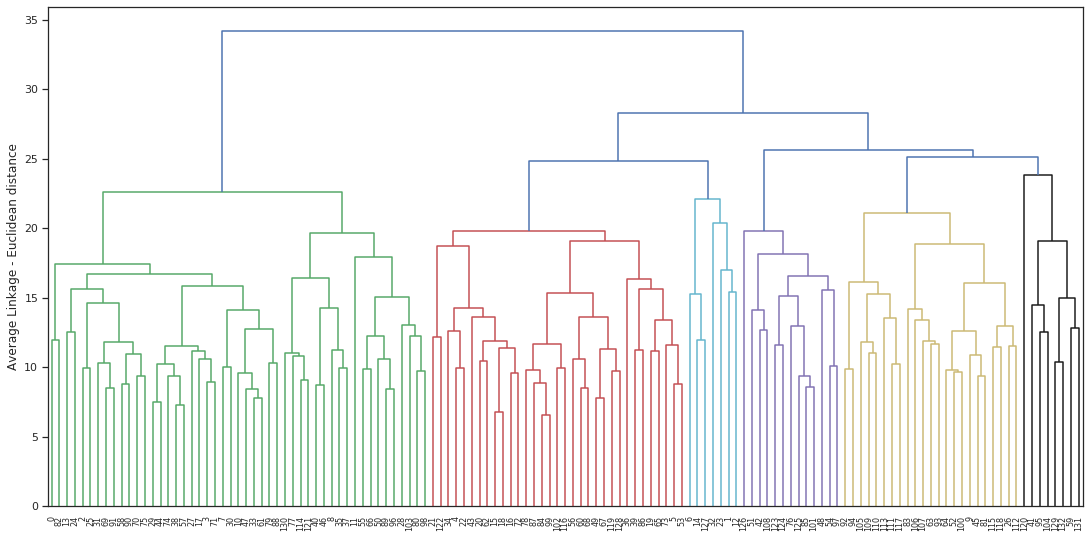

In [ ]:
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(df4)

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(X, n_neighbors=5, include_self=False)

# linkage model - Scipy
row_clusters = linkage(X, method='ward', metric='euclidean')

# plot dendrogram
plt.figure(figsize=(15,7.5))
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Average Linkage - Euclidean distance')
plt.tick_params(axis="x", labelsize=8)
plt.show()

In [ ]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')

# 4. Kmeans Clustering

## 4.1 Determining the number of clusters <i>k</i> with the elbow method

Calculate the sum of squared distances between each point in a cluster and the cluster's centre

In [ ]:
# k means determine k
distances = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df4)
    kmeanModel.fit(df4)
    distances.append(kmeanModel.inertia_)

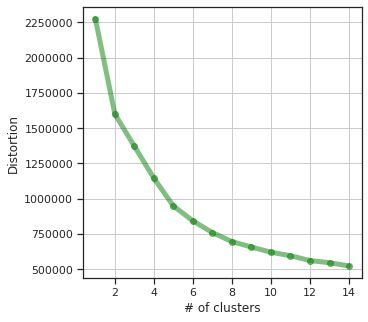

In [ ]:
# Plot the elbow
plt.figure(figsize=(5,5))
plt.plot(K, distances, 'bo-', alpha=0.5, c='green', lw=5)
plt.xlabel('# of clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

## 4.2 Choosing the number of clusters with silhouette analysis

Silhouette analysis can be used to study the **separation distance** between the resulting clusters and thus a good metric used for choosing an optimal value for the number of clusters *k*. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighbouring clusters and thus provides a way to assess parameters like number of clusters visually. 

### Silhouette Coefficient

**Silhouette coefficient value has a range of [-1, 1]** 

* Silhouette coefficient close to 1 indicates that the sample is far away from the neighbouring clusters
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighbouring clusters
* Negative coefficient values indicate that those samples might have been assigned to the wrong cluster

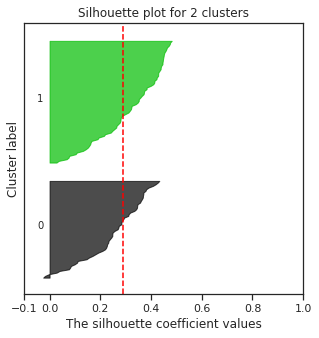

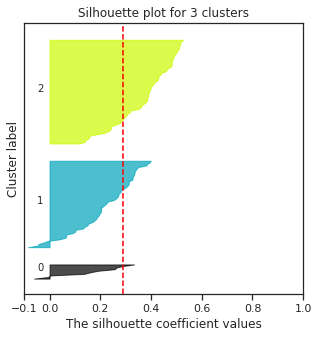

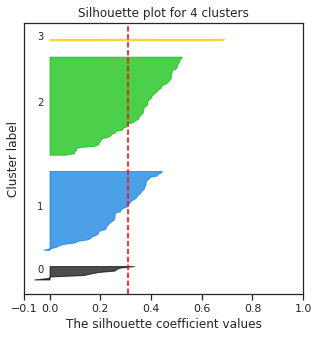

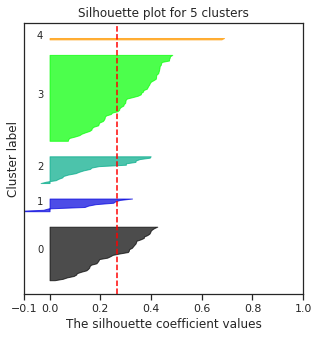

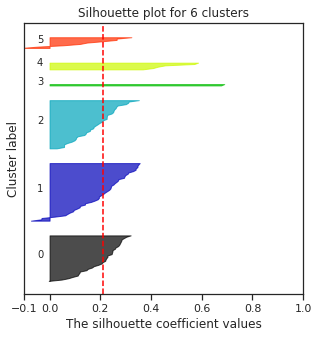

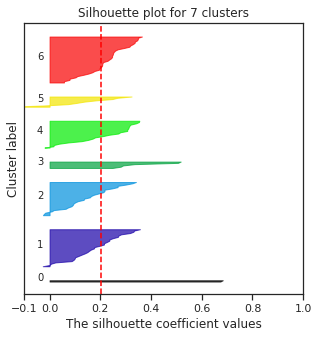

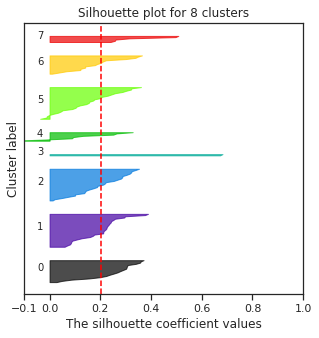

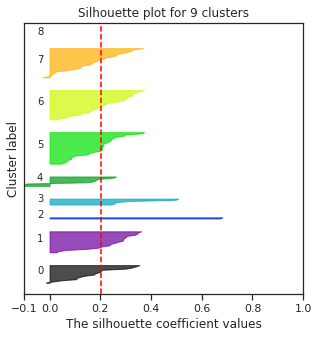

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters: 
  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.

  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(5, 5)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df4) + (n_clusters + 1) * 10])

  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(df4)
  y_pred = kmeans.predict(df4)
  silhouette_avg = silhouette_score(df4, y_pred)
  sample_silhouette_values = silhouette_samples(df4, y_pred)

  y_lower = 10
  cmap = cm.get_cmap("nipy_spectral")
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cmap(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, 
                        ith_cluster_silhouette_values,
                        facecolor=color, 
                        edgecolor=color, 
                        alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples


  ax1.set_title("Silhouette plot for " + str(n_clusters) + " clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7).fit(df4)

In [ ]:
df4

,ID,Age,Sex,CAD,STMI,NSTMI,PCI - INCOMPLETE,HTN,DLD,DM,CKD,A fib,Lung Dz,TIA/stroke,OSA,Block,Pacemaker,HYPOTHYROIDISM,CMP,HCM,SBP (mmHg),DBP,HR (BPM),BB,CCB,ACEi,ARB,MRA,Statin,SYNTHROID,PPI,ALLOPURINOL,PUFFER,OTHER MEDS,Cr,Na,K,Chol,HDL,A1C,HFpEF (%),IVSd (6-10) mm,LVPWd (6-10) mm,LVIDd index (22-30) mm/m^2,LVIDs (25-40) mm,LV Mass index (49-115) g/m^2,LV RWT (<0.43),LVOT diam mm,MV Peak E cm/s,MV Peak A (cm/s),Decel Time msec,MV E/A Ratio,Lateral e' cm/s,Septal e' cm/s,Ave E/e' Ratio,Left Atrium (30-40) mm,LA Vol index (16-34) ml/m^2,RVd A4C (25-41) mm,Aorta Sinuses index (<21) mm/m^2,Prox Asc Aorta index (<19) mm/m^2,other_dz_cnt,antiplatelet,blood-clots,lasix-other,metfor-insul-DM,Ethnicity_Others,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_indian,Ethnicity_middle east,Filling Pressure_elevated,Filling Pressure_indeterminate,Filling Pressure_normal,Diastolic Dysfunction_indeterminate,Diastolic Dysfunction_mild,Diastolic Dysfunction_moderate,Diastolic Dysfunction_severe,MR_mi,MR_mimo,MR_mo,MR_n,MS_n,TR_mi,TR_mimo,TR_mo,TR_n,TS_n,AS_mi,AS_mimo,AS_mo,AS_n,AS_scl,AR_mi,AR_mimo,AR_mo,AR_n,PR_mi,PR_mimo,PR_mo,PR_n,PS_n
0,2,56,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,146,80,53,1,0,0,1,0,0,0,0,0,0,0,78,139,3,4,1,5,50,11,11,23,42,103,0,22,72,52,193,1,13,6,8,46,29,41,14,16,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
1,3,59,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,75,73,1,0,1,0,0,1,0,0,0,0,0,81,143,4,3,1,5,50,12,13,31,48,184,0,22,81,35,187,2,4,4,20,53,76,36,23,22,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1
5,7,65,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,113,73,50,1,0,1,0,0,1,0,0,0,0,0,66,138,5,3,1,5,45,9,9,25,27,82,0,19,78,95,286,1,6,6,13,35,37,28,21,21,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
6,8,78,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,149,80,80,1,0,0,1,0,1,0,0,0,0,1,99,141,5,2,1,7,50,9,9,23,29,63,0,20,50,71,391,1,6,4,9,34,25,24,17,19,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,10,85,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,188,77,58,1,0,0,1,0,1,1,0,0,0,0,81,141,4,4,2,6,60,9,9,23,29,64,0,19,69,72,222,1,5,4,15,65,35,34,17,18,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1
8,16,86,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,76,57,0,0,0,0,0,0,0,0,0,0,2,67,140,5,4,1,6,60,11,11,28,27,106,0,20,58,87,275,1,7,4,11,37,42,29,21,23,2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
9,17,85,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,123,61,63,1,0,0,1,0,1,0,1,0,0,1,95,138,4,3,2,7,40,9,9,25,31,68,0,19,67,105,203,1,4,4,16,40,25,30,19,19,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
10,18,61,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,106,68,93,0,0,0,0,0,0,0,0,0,1,6,199,141,3,4,2,5,65,10,9,20,23,54,1,18,74,98,313,1,8,9,9,35,30,33,18,18,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
12,20,80,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,185,68,50,1,1,0,1,0,1,0,0,0,0,2,93,138,4,5,1,6,60,10,10,28,32,103,0,19,70,82,267,1,5,5,15,47,39,35,16,17,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1
13,21,90,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,122,70,77,1,1,0,0,0,0,0,1,0,0,0,93,143,5,3,1,6,60,10,10,21,25,59,1,20,83,95,204,1,7,7,12,38,40,34,19,19,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1


In [ ]:
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 2000

In [ ]:
df4.columns

Index(['ID', 'Age', 'Sex', 'CAD', 'STMI', 'NSTMI', 'PCI - INCOMPLETE', 'HTN',
       'DLD', 'DM', 'CKD', 'A fib', 'Lung Dz', 'TIA/stroke', 'OSA', 'Block',
       'Pacemaker', 'HYPOTHYROIDISM', 'CMP', 'HCM', 'SBP (mmHg)', 'DBP',
       'HR (BPM)', 'BB', 'CCB', 'ACEi', 'ARB', 'MRA', 'Statin', 'SYNTHROID',
       'PPI', 'ALLOPURINOL', 'PUFFER', 'OTHER MEDS', 'Cr', 'Na', 'K', 'Chol',
       'HDL', 'A1C', 'HFpEF (%)', 'IVSd (6-10) mm', 'LVPWd (6-10) mm',
       'LVIDd index (22-30) mm/m^2', 'LVIDs (25-40) mm',
       'LV Mass index (49-115) g/m^2', 'LV RWT (<0.43)', 'LVOT diam mm',
       'MV Peak E cm/s', 'MV Peak A (cm/s)', 'Decel Time msec', 'MV E/A Ratio',
       'Lateral e' cm/s', 'Septal e' cm/s', 'Ave E/e' Ratio',
       'Left Atrium (30-40) mm', 'LA Vol index (16-34) ml/m^2',
       'RVd A4C (25-41) mm', 'Aorta Sinuses index (<21) mm/m^2',
       'Prox Asc Aorta index (<19) mm/m^2', 'other_dz_cnt', 'antiplatelet',
       'blood-clots', 'lasix-other', 'metfor-insul-DM', 'Ethnicity_Ot

Try using k-modes to do cluster with null value
https://github.com/nicodv/kmodes


In [ ]:
df3.columns.get_loc("Filling Pressure")

42

In [ ]:
df3.shape

(133, 76)

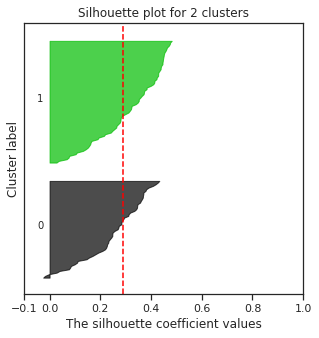

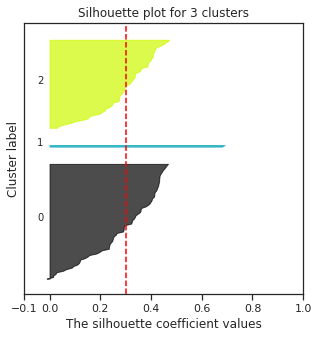

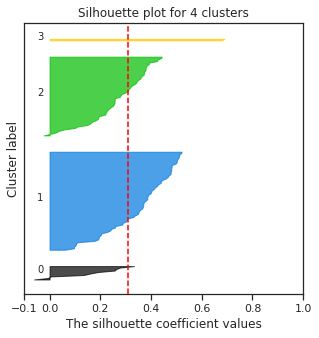

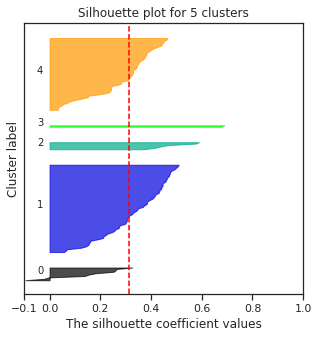

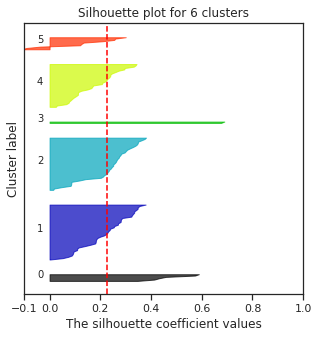

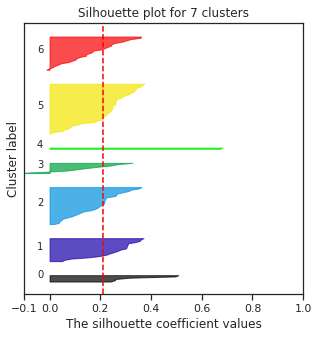

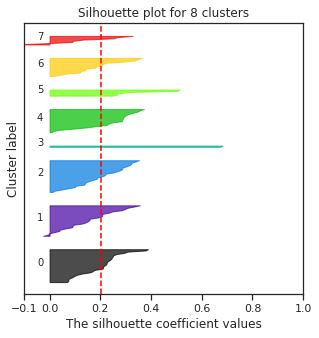

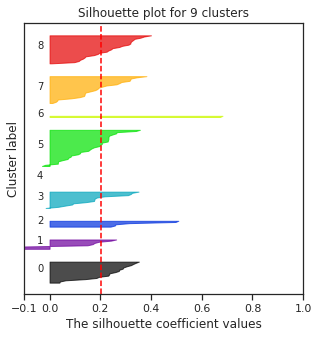

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters: 
  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.

  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(5, 5)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df4) + (n_clusters + 1) * 10])

  kp = KPrototypes(n_clusters=n_clusters, n_init=133, init='Cao', n_jobs=-1)
  kp.fit(df3, categorical=[3, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
  y_pred = kp.predict(df3, categorical=[3, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
  silhouette_avg = silhouette_score(df4, y_pred)
  sample_silhouette_values = silhouette_samples(df4, y_pred)

  y_lower = 10
  cmap = cm.get_cmap("nipy_spectral")
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

      ith_cluster_silhouette_values.sort()  

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cmap(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, 
                        ith_cluster_silhouette_values,
                        facecolor=color, 
                        edgecolor=color, 
                        alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples


  ax1.set_title("Silhouette plot for " + str(n_clusters) + " clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.show()

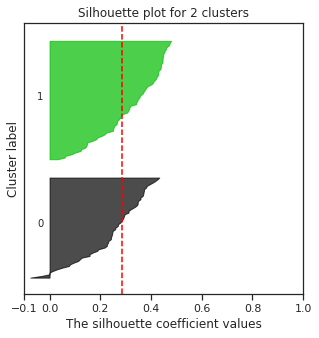

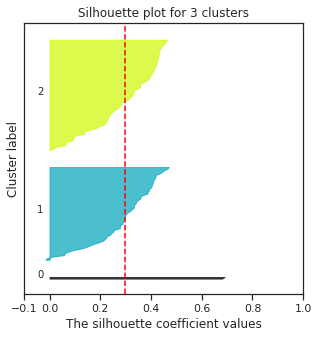

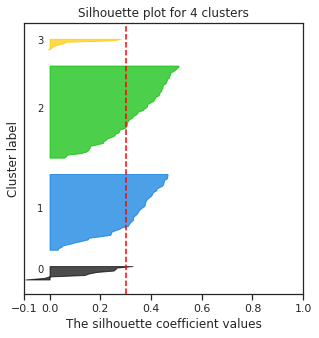

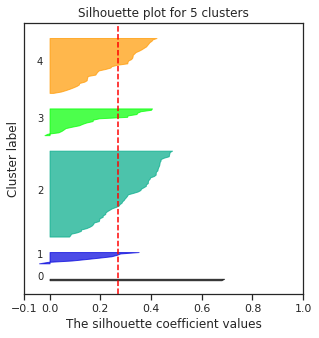

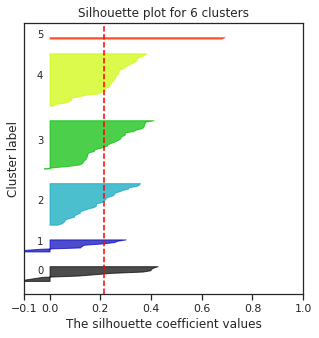

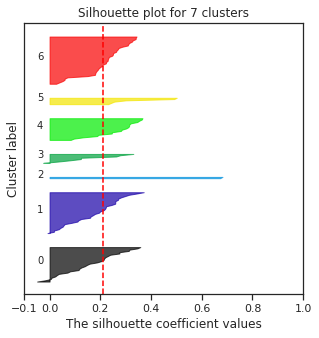

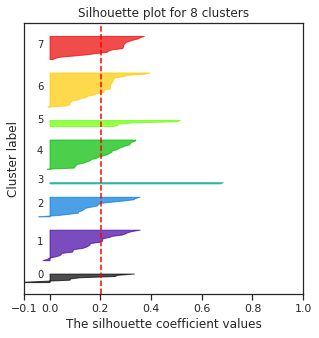

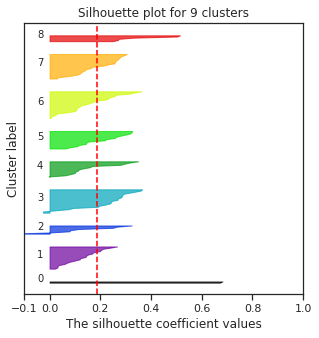

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters: 
  # The 1st subplot is the silhouette plot
  # The silhouette coefficient can range from -1, 1 but in this example all
  # lie within [-0.1, 1]
  # The (n_clusters+1)*10 is for inserting blank space between silhouette
  # plots of individual clusters, to demarcate them clearly.

  fig, (ax1) = plt.subplots(1, 1)
  fig.set_size_inches(5, 5)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df4) + (n_clusters + 1) * 10])

  kp = KPrototypes(n_clusters=n_clusters, n_init=20, init='Huang')
  kp.fit(df3, categorical=[3, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
  y_pred = kp.predict(df3, categorical=[3, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])
  silhouette_avg = silhouette_score(df4, y_pred)
  sample_silhouette_values = silhouette_samples(df4, y_pred)

  y_lower = 10
  cmap = cm.get_cmap("nipy_spectral")
  for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
      ith_cluster_silhouette_values = sample_silhouette_values[y_pred == i]

      ith_cluster_silhouette_values.sort()  

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cmap(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, 
                        ith_cluster_silhouette_values,
                        facecolor=color, 
                        edgecolor=color, 
                        alpha=0.7)

      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples


  ax1.set_title("Silhouette plot for " + str(n_clusters) + " clusters")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhouette score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  plt.show()

In [ ]:
kp = KPrototypes(n_clusters=8, init='Huang', n_jobs=-1)
cluster_df3 = kp.fit_predict(df3, categorical=[3, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])


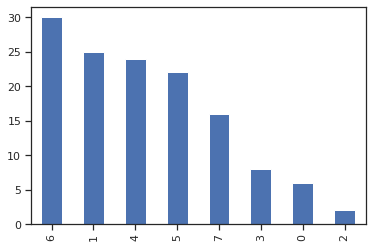

In [ ]:
df3['cluster'] = cluster_df3
df3['cluster'].value_counts().plot(kind = 'bar')

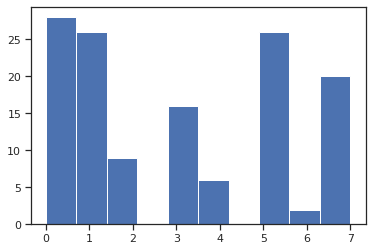

In [ ]:
plt.hist(cluster_df3)
plt.show()

# 5 Visualization

In [ ]:
df4

,ID,Age,Sex,CAD,STMI,NSTMI,PCI - INCOMPLETE,HTN,DLD,DM,CKD,A fib,Lung Dz,TIA/stroke,OSA,Block,Pacemaker,HYPOTHYROIDISM,CMP,HCM,SBP (mmHg),DBP,HR (BPM),BB,CCB,ACEi,ARB,MRA,Statin,SYNTHROID,PPI,ALLOPURINOL,PUFFER,OTHER MEDS,Cr,Na,K,Chol,HDL,A1C,HFpEF (%),IVSd (6-10) mm,LVPWd (6-10) mm,LVIDd index (22-30) mm/m^2,LVIDs (25-40) mm,LV Mass index (49-115) g/m^2,LV RWT (<0.43),LVOT diam mm,MV Peak E cm/s,MV Peak A (cm/s),Decel Time msec,MV E/A Ratio,Lateral e' cm/s,Septal e' cm/s,Ave E/e' Ratio,Left Atrium (30-40) mm,LA Vol index (16-34) ml/m^2,RVd A4C (25-41) mm,Aorta Sinuses index (<21) mm/m^2,Prox Asc Aorta index (<19) mm/m^2,other_dz_cnt,antiplatelet,blood-clots,lasix-other,metfor-insul-DM,Ethnicity_Others,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_indian,Ethnicity_middle east,Filling Pressure_elevated,Filling Pressure_indeterminate,Filling Pressure_normal,Diastolic Dysfunction_indeterminate,Diastolic Dysfunction_mild,Diastolic Dysfunction_moderate,Diastolic Dysfunction_severe,MR_mi,MR_mimo,MR_mo,MR_n,MS_n,TR_mi,TR_mimo,TR_mo,TR_n,TS_n,AS_mi,AS_mimo,AS_mo,AS_n,AS_scl,AR_mi,AR_mimo,AR_mo,AR_n,PR_mi,PR_mimo,PR_mo,PR_n,PS_n
0,2,56,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,146,80,53,1,0,0,1,0,0,0,0,0,0,0,78,139,3,4,1,5,50,11,11,23,42,103,0,22,72,52,193,1,13,6,8,46,29,41,14,16,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
1,3,59,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,154,75,73,1,0,1,0,0,1,0,0,0,0,0,81,143,4,3,1,5,50,12,13,31,48,184,0,22,81,35,187,2,4,4,20,53,76,36,23,22,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1
5,7,65,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,113,73,50,1,0,1,0,0,1,0,0,0,0,0,66,138,5,3,1,5,45,9,9,25,27,82,0,19,78,95,286,1,6,6,13,35,37,28,21,21,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
6,8,78,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,149,80,80,1,0,0,1,0,1,0,0,0,0,1,99,141,5,2,1,7,50,9,9,23,29,63,0,20,50,71,391,1,6,4,9,34,25,24,17,19,1,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
7,10,85,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,188,77,58,1,0,0,1,0,1,1,0,0,0,0,81,141,4,4,2,6,60,9,9,23,29,64,0,19,69,72,222,1,5,4,15,65,35,34,17,18,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1
8,16,86,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,76,57,0,0,0,0,0,0,0,0,0,0,2,67,140,5,4,1,6,60,11,11,28,27,106,0,20,58,87,275,1,7,4,11,37,42,29,21,23,2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1
9,17,85,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,123,61,63,1,0,0,1,0,1,0,1,0,0,1,95,138,4,3,2,7,40,9,9,25,31,68,0,19,67,105,203,1,4,4,16,40,25,30,19,19,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
10,18,61,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,106,68,93,0,0,0,0,0,0,0,0,0,1,6,199,141,3,4,2,5,65,10,9,20,23,54,1,18,74,98,313,1,8,9,9,35,30,33,18,18,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1
12,20,80,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,185,68,50,1,1,0,1,0,1,0,0,0,0,2,93,138,4,5,1,6,60,10,10,28,32,103,0,19,70,82,267,1,5,5,15,47,39,35,16,17,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1
13,21,90,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,122,70,77,1,1,0,0,0,0,0,1,0,0,0,93,143,5,3,1,6,60,10,10,21,25,59,1,20,83,95,204,1,7,7,12,38,40,34,19,19,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1


In [ ]:
cluster_df4 = cluster.fit_predict(df4)
cluster_df3 = cluster.fit_predict(df4)
kmeans_cluster_df4 = kmeans.predict(df4)
kmeans_cluster_df3 = kmeans.predict(df4)

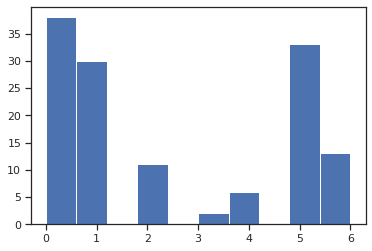

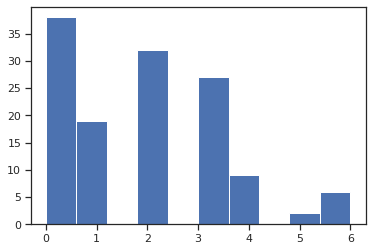

In [ ]:
plt.hist(cluster_df4)
plt.show()
plt.hist(kmeans_cluster_df4)
plt.show()

In [ ]:
kmeans_cluster_df4

array([3, 3, 1, 6, 3, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 6, 6, 1,
       3, 1, 1, 6, 1, 3, 1, 3, 6, 1, 5, 3, 1, 3, 5, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 3, 4, 2, 2, 6, 3, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

In [ ]:
df4['cluster'] = cluster_df4
df3['cluster'] = cluster_df3
df4['kmeans_orig'] = kmeans_cluster_df4
df3['kmeans_orig'] = kmeans_cluster_df3

In [ ]:
#0=3
#1=0
#2=2
#3=5
#4=6
#5=1
#6=4
def cluster_match(row):
  if row == 0:
    return 1
  elif row == 1:
    return 5
  elif row == 2:
    return 2
  elif row == 3:
    return 0
  elif row == 4:
    return 6
  elif row == 5:
    return 3
  elif row == 6:
    return 4
df4['kmeans_cluster'] = df4['kmeans_orig'].apply(cluster_match)
df3['kmeans_cluster'] = df3['kmeans_orig'].apply(cluster_match)

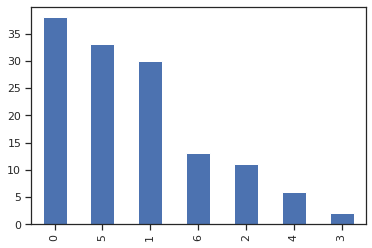

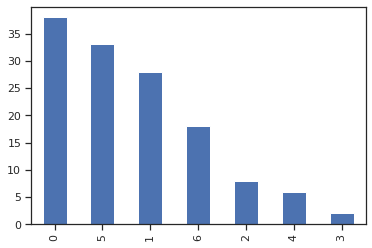

In [ ]:
df4['cluster'].value_counts().plot(kind = 'bar')
plt.show()
df4['kmeans_cluster'].value_counts().plot(kind = 'bar')

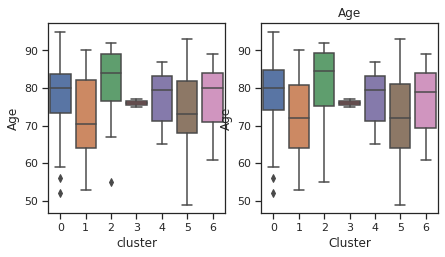

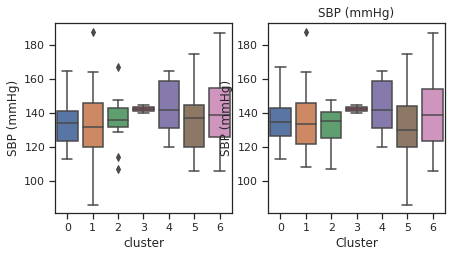

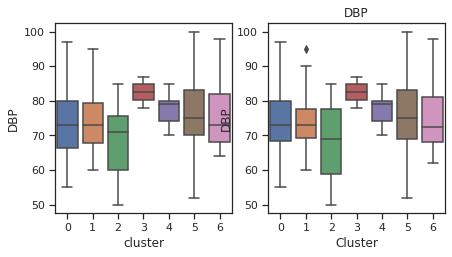

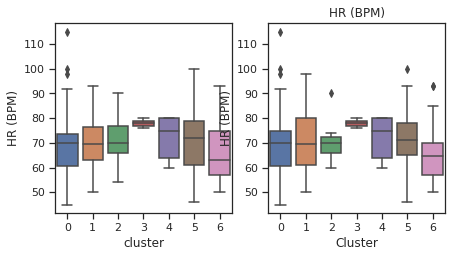

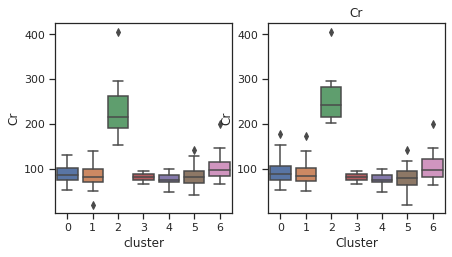

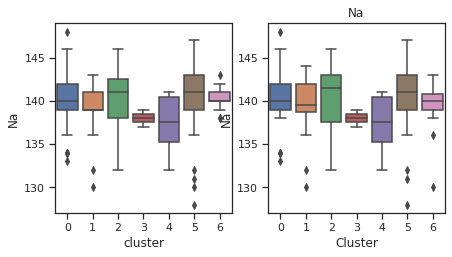

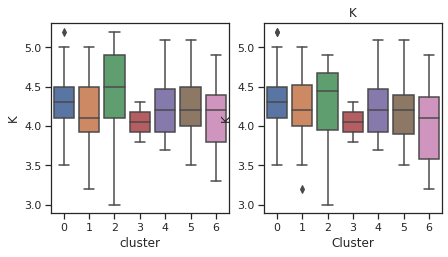

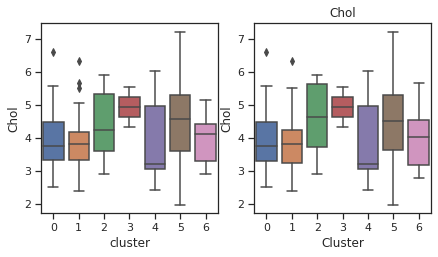

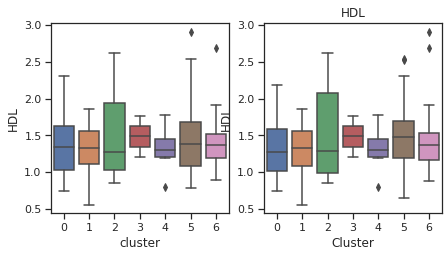

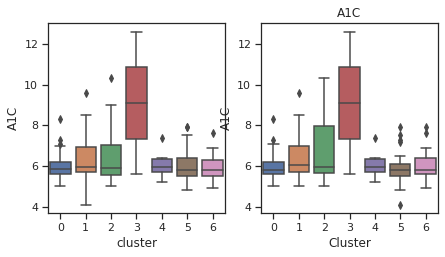

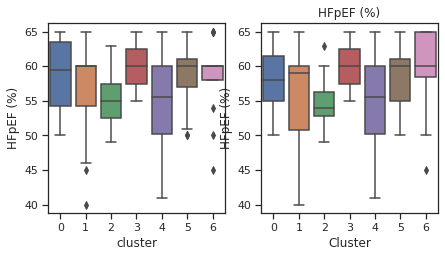

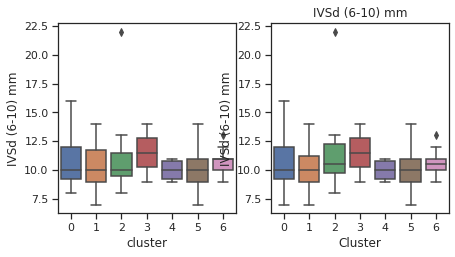

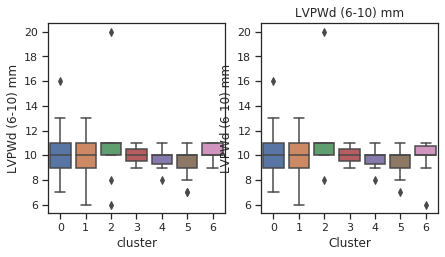

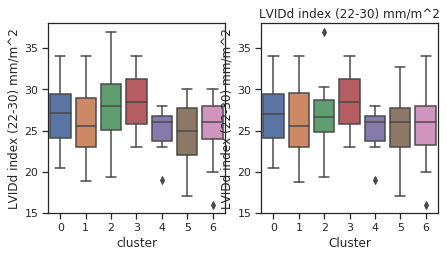

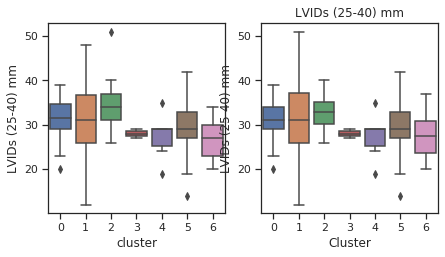

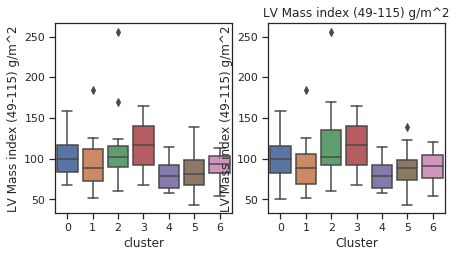

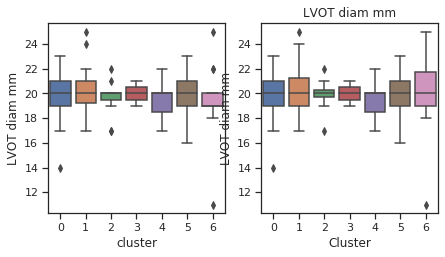

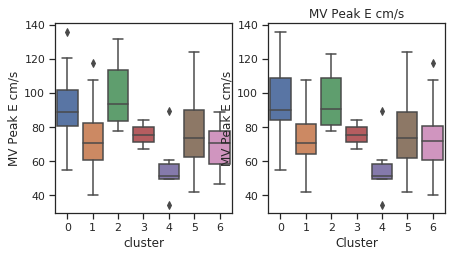

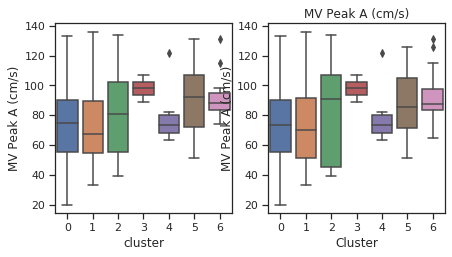

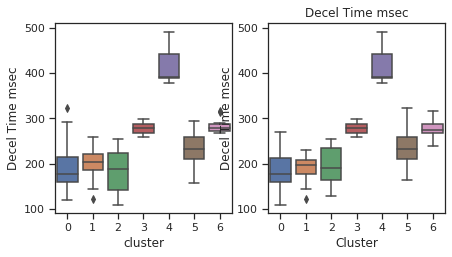

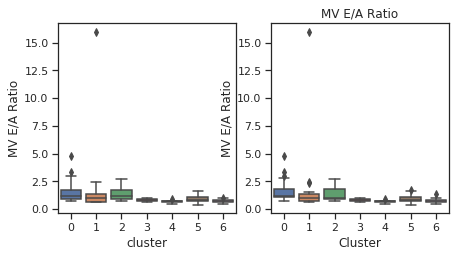

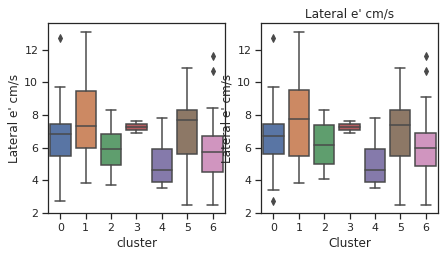

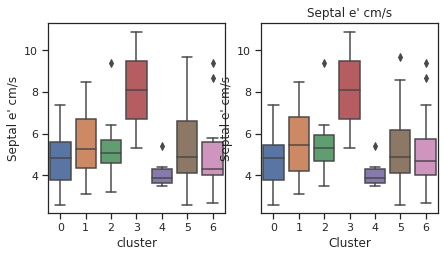

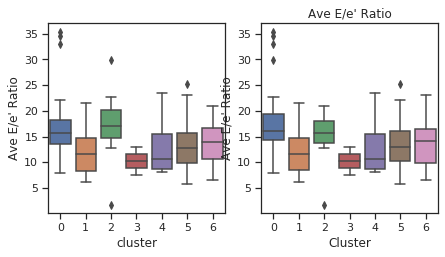

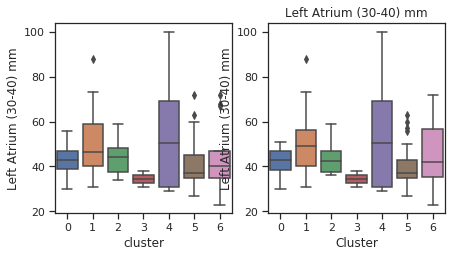

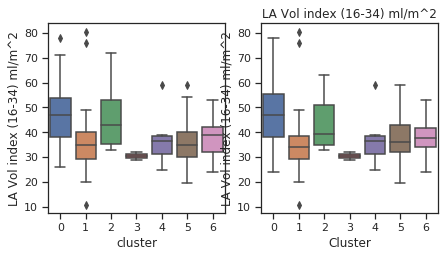

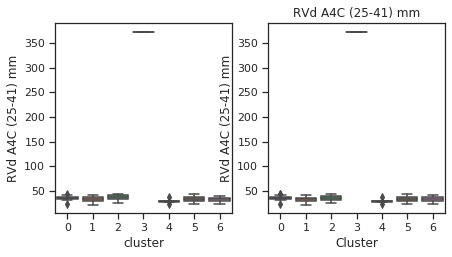

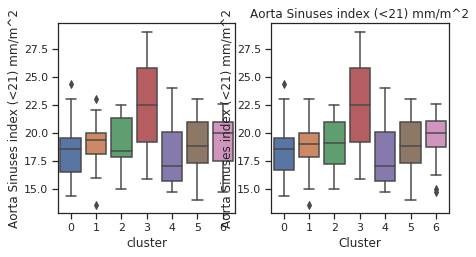

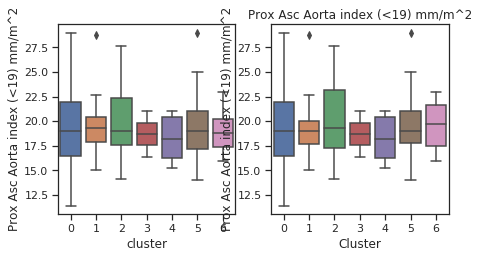

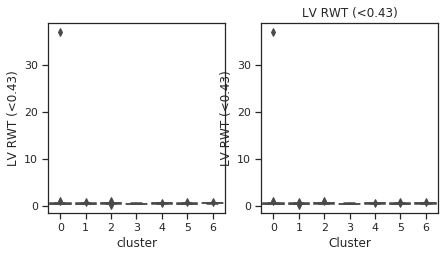

In [ ]:
range_col = ['Age','SBP (mmHg)','DBP','HR (BPM)','Cr','Na','K','Chol','HDL','A1C','HFpEF (%)','IVSd (6-10) mm',\
             'LVPWd (6-10) mm','LVIDd index (22-30) mm/m^2','LVIDs (25-40) mm','LV Mass index (49-115) g/m^2',\
             'LVOT diam mm','MV Peak E cm/s','MV Peak A (cm/s)','Decel Time msec','MV E/A Ratio',"Lateral e' cm/s",\
             "Septal e' cm/s","Ave E/e' Ratio",'Left Atrium (30-40) mm','LA Vol index (16-34) ml/m^2','RVd A4C (25-41) mm',\
             'Aorta Sinuses index (<21) mm/m^2','Prox Asc Aorta index (<19) mm/m^2','LV RWT (<0.43)']

for col in range_col:
  # Create a subplot with 1 row and 2 columns

  

  fig, ax = plt.subplots(1, 2, figsize=(7, 3.5), sharex=True)

  sns.boxplot(x="cluster", y=col, data=df4, ax=ax[0])
  plt.xlabel('Cluster')
  plt.title(col)
  
  sns.boxplot(x="kmeans_cluster", y=col, data=df4, ax=ax[1])
  plt.xlabel('Cluster')

  plt.show()

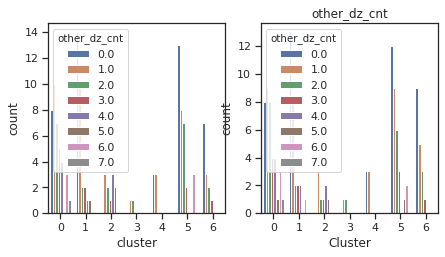

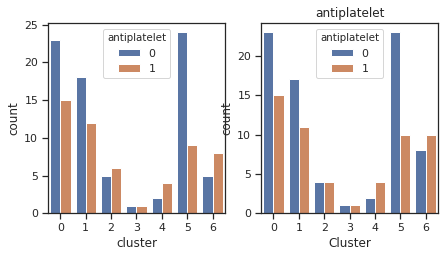

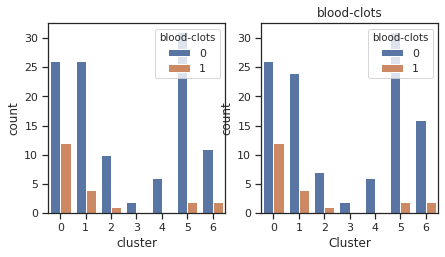

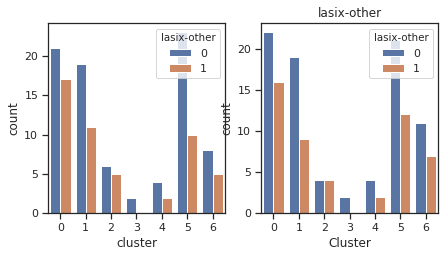

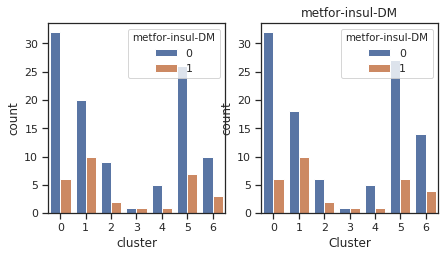

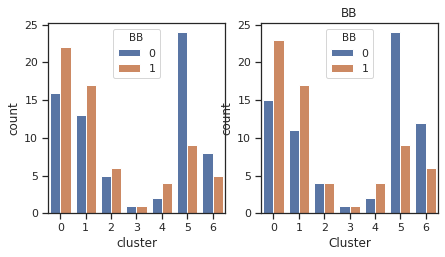

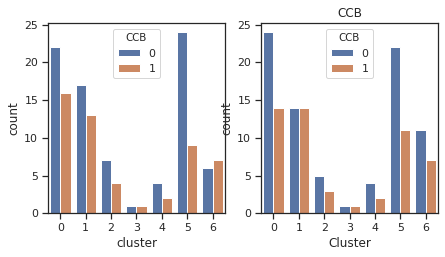

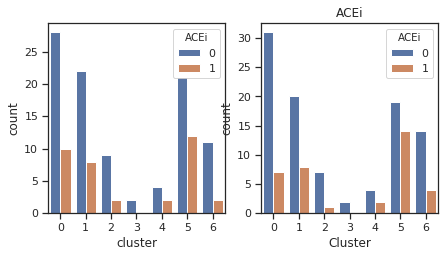

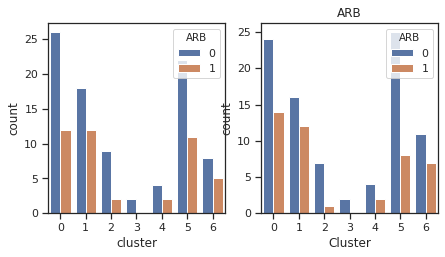

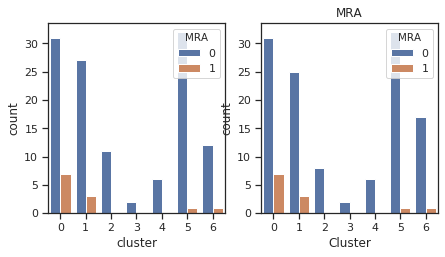

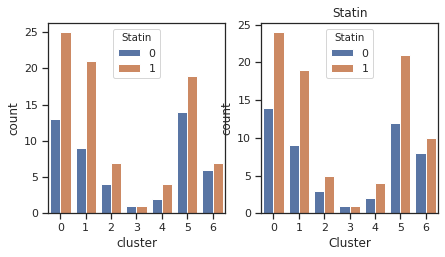

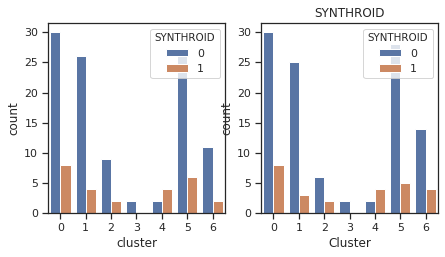

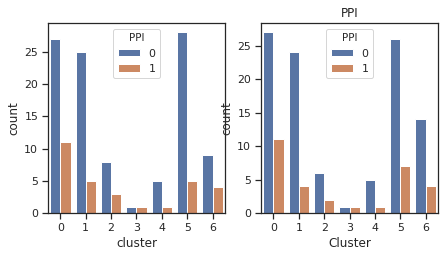

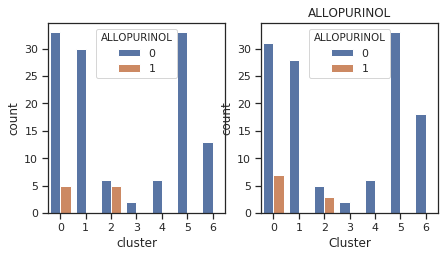

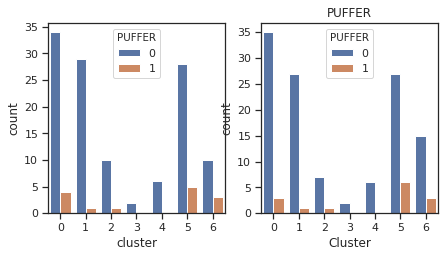

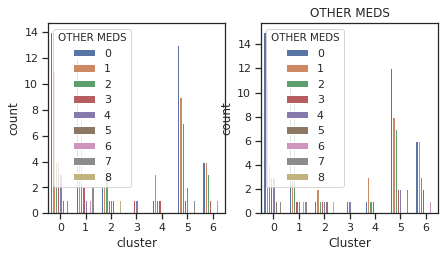

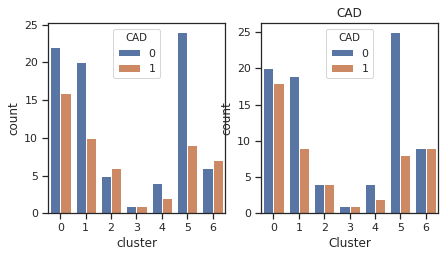

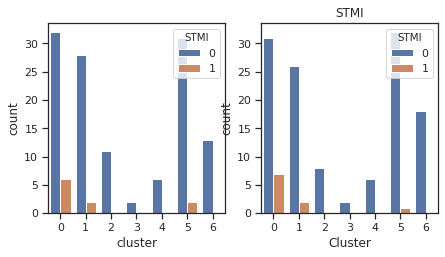

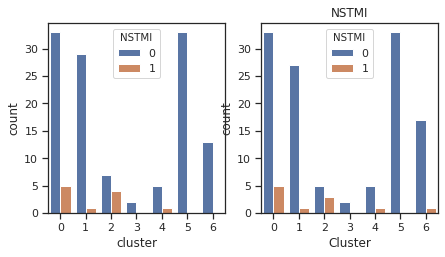

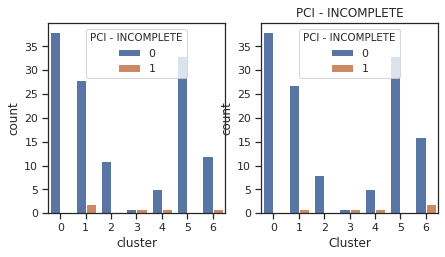

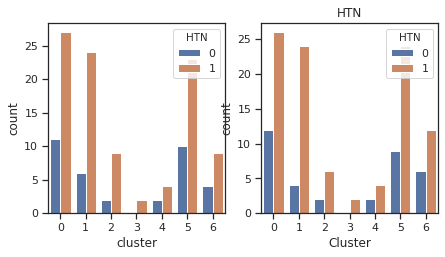

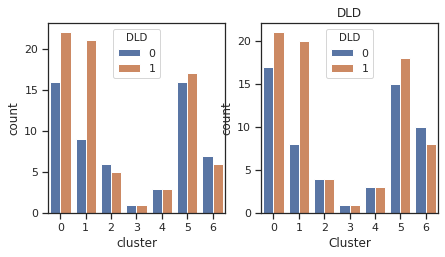

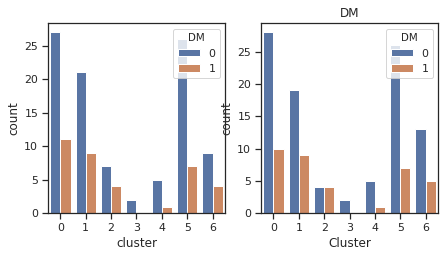

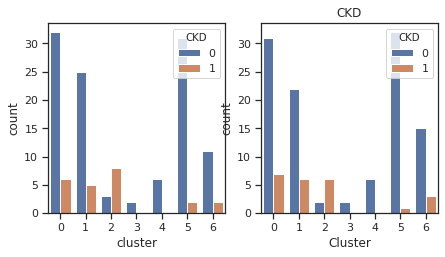

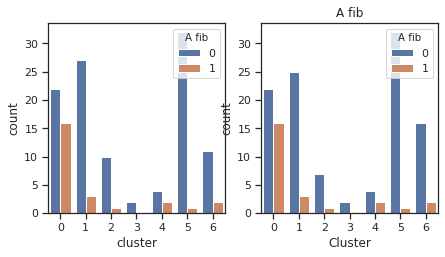

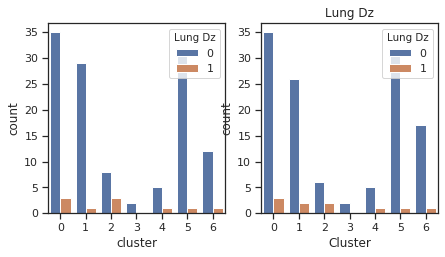

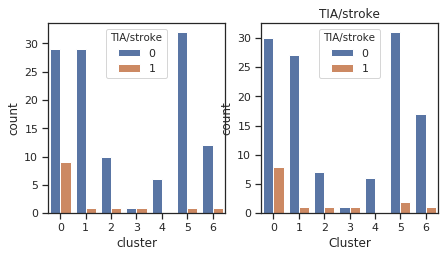

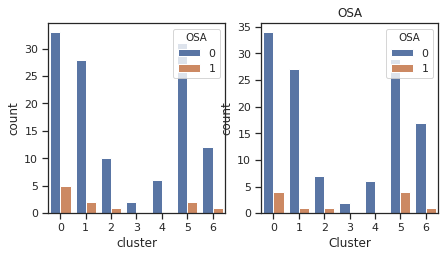

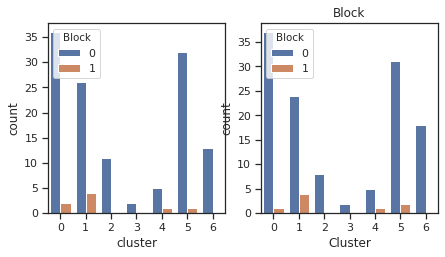

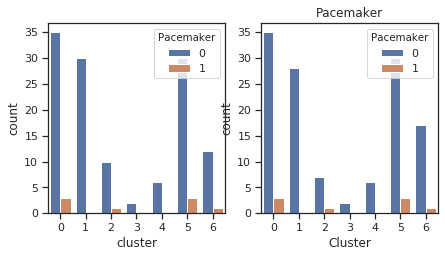

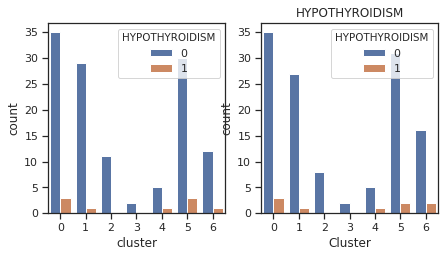

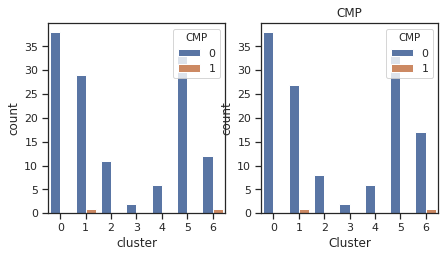

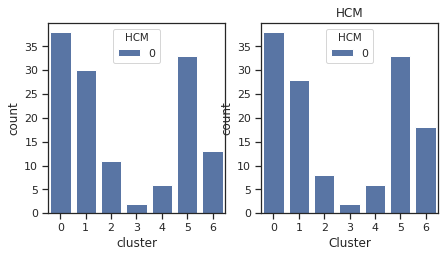

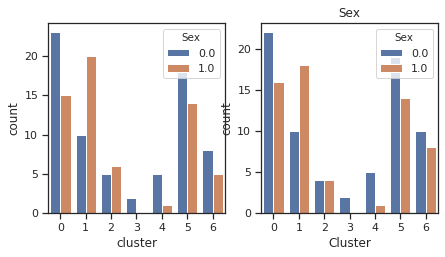

In [ ]:
bool_col = ['other_dz_cnt','antiplatelet','blood-clots','lasix-other','metfor-insul-DM',\
            'BB','CCB','ACEi','ARB','MRA','Statin','SYNTHROID','PPI','ALLOPURINOL',\
            'PUFFER','OTHER MEDS','CAD','STMI','NSTMI','PCI - INCOMPLETE','HTN','DLD','DM','CKD',\
            'A fib','Lung Dz','TIA/stroke','OSA','Block','Pacemaker','HYPOTHYROIDISM','CMP','HCM','Sex']
for col in bool_col:
  # Create a subplot with 1 row and 2 columns
  fig, ax = plt.subplots(1, 2, figsize=(7, 3.5), sharex=True)
 
  sns.countplot(x="cluster", hue=col, data=df4, ax=ax[0])
  plt.xlabel('Cluster')
  plt.title(col)
  
  sns.countplot(x="kmeans_cluster", hue=col, data=df4, ax=ax[1])
  plt.xlabel('Cluster')

  plt.show()

In [ ]:
cluster_0 = pd.concat([df4[df4['cluster']==0]['ID'], df4[df4['kmeans_cluster']==0]['ID']], axis=1)
cluster_1 = pd.concat([df4[df4['cluster']==1]['ID'], df4[df4['kmeans_cluster']==1]['ID']], axis=1)
cluster_2 = pd.concat([df4[df4['cluster']==2]['ID'], df4[df4['kmeans_cluster']==2]['ID']], axis=1)
cluster_3 = pd.concat([df4[df4['cluster']==3]['ID'], df4[df4['kmeans_cluster']==3]['ID']], axis=1)
cluster_4 = pd.concat([df4[df4['cluster']==4]['ID'], df4[df4['kmeans_cluster']==4]['ID']], axis=1)
cluster_5 = pd.concat([df4[df4['cluster']==5]['ID'], df4[df4['kmeans_cluster']==5]['ID']], axis=1)
cluster_6 = pd.concat([df4[df4['cluster']==6]['ID'], df4[df4['kmeans_cluster']==6]['ID']], axis=1)


In [ ]:
cluster_0

,ID,ID
95,147,nan
99,151,151
102,154,154
104,156,156
109,162,162
114,168,168
127,183,183
129,185,185
132,nan,188
134,190,190


In [ ]:
cluster_1

,ID,ID
0,2,2
1,3,3
7,10,10
9,17,17
13,21,21
14,22,22
16,24,24
18,26,26
21,30,30
22,31,nan


In [ ]:
cluster_2

,ID,ID
66,91,91
74,105,nan
87,130,130
125,181,181
132,188,nan
135,191,191
145,201,201
179,235,235
182,238,238
184,240,240


In [ ]:
cluster_3

,ID,ID
44,59,59
48,63,63


In [ ]:
cluster_4

,ID,ID
6,8,8
26,37,37
28,39,39
35,48,48
42,57,57
69,97,97


In [ ]:
cluster_5

,ID,ID
56,73,nan
67,95,95
68,nan,96
73,104,nan
75,106,nan
76,107,107
78,111,111
80,113,113
82,115,115
85,124,124


In [ ]:
cluster_6

,ID,ID
5,7,7
8,16,16
10,18,18
12,20,20
17,25,25
22,nan,31
24,nan,35
29,41,41
31,44,44
33,46,46


In [ ]:
# Scatter Plot with Hue for visualizing data in 3-D

pp = sns.pairplot(df3.loc[:,categorical_col], hue='clusters', size=1.8, aspect=1.8, 
                  palette={"0": "#FF9999", "1": "#FFE888", "2": "#3498db"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))


In [ ]:
import plotly.graph_objects as go
import chart_studio.plotly as py
from sklearn.preprocessing import MinMaxScaler

def avg_max_scaler(df):
  new_df = df.copy()
  new_df = new_df.drop(['ID', 'cluster', 'kmeans_orig'], axis=1)
  scaler = MinMaxScaler((0, 10))
  new_df = scaler.fit_transform(new_df)
  columns_name = df.columns.values.tolist()
  for i in ['ID', 'cluster', 'kmeans_orig']:
    columns_name.remove(i)
  new_df = pd.DataFrame(new_df, columns=columns_name)
  new_df.reset_index(drop=True, inplace=True)
  df.reset_index(drop=True, inplace=True)
  new_df = pd.concat([new_df, df['kmeans_orig']], axis=1)
  new_df = new_df.groupby('kmeans_orig').mean()
  return new_df


def radar_chart(df_avg_scaled, cluster, type):
  if type == 'basic':
    df = df_avg_scaled[['Age', 'Sex']]
  elif type == 'Hx/PE':
    df = df_avg_scaled[['CAD', 'STMI', 'NSTMI', 'PCI - INCOMPLETE', 'HTN', 
                        'DLD', 'DM', 'CKD', 'A fib', 'Lung Dz', 'TIA/stroke', 
                        'OSA', 'Block', 'Pacemaker', 'HYPOTHYROIDISM', 'CMP', 
                        'HCM', 'SBP (mmHg)', 'DBP', 'HR (BPM)']]
  elif type == 'Meds':
    df = df_avg_scaled[['BB', 'CCB', 'ACEi', 'ARB', 'MRA', 'Statin', 
                        'SYNTHROID', 'PPI', 'ALLOPURINOL', 'PUFFER', 
                        'OTHER MEDS']]
  elif type == 'Blood Work':
    df = df_avg_scaled[['Cr', 'Na', 'K', 'Chol', 'HDL', 'A1C']]
  elif type == 'Left Ventricle':
    df = df_avg_scaled[['HFpEF (%)', 'IVSd (6-10) mm', 'LVPWd (6-10) mm', 
                        'LVIDd index (22-30) mm/m^2', 'LVIDs (25-40) mm', 
                        'LV Mass index (49-115) g/m^2', 'LV RWT (<0.43)', 
                        'LVOT diam mm']]
  elif type == 'LV Diastolic Dysfunction':
    df = df_avg_scaled[['MV Peak E cm/s', 'MV Peak A (cm/s)', 'Decel Time msec', 
                        'MV E/A Ratio', "Lateral e' cm/s", "Septal e' cm/s", 
                        "Ave E/e' Ratio", 'Left Atrium (30-40) mm', 
                        'LA Vol index (16-34) ml/m^2'] ]
  elif type == 'Right Ventricle':
    df = df_avg_scaled[['RVd A4C (25-41) mm', 'Aorta Sinuses index (<21) mm/m^2', 
                        'Prox Asc Aorta index (<19) mm/m^2', 'other_dz_cnt', 
                        'antiplatelet', 'blood-clots', 'lasix-other', 
                        'metfor-insul-DM']]
  elif type == 'Ethnicity':
    df = df_avg_scaled[['Ethnicity_Others', 'Ethnicity_asian', 
                        'Ethnicity_caucasian', 'Ethnicity_indian', 
                        'Ethnicity_middle east']]
  elif type == 'FP DD':
    df = df_avg_scaled[['Filling Pressure_elevated', 
                        'Filling Pressure_indeterminate', 
                        'Filling Pressure_normal', 
                        'Diastolic Dysfunction_indeterminate', 
                        'Diastolic Dysfunction_mild', 
                        'Diastolic Dysfunction_moderate', 
                        'Diastolic Dysfunction_severe']]
  elif type == 'MR TR':
    df = df_avg_scaled[['MR_mi', 'MR_mimo', 'MR_mo', 'MR_n', 'MS_n', 'TR_mi', 
                        'TR_mimo', 'TR_mo', 'TR_n', 'TS_n']]
  elif type == 'AS AR':
    df = df_avg_scaled[['AS_mi', 'AS_mimo', 'AS_mo', 'AS_n', 'AS_scl', 'AR_mi', 
                        'AR_mimo', 'AR_mo', 'AR_n', 'PR_mi']]
  elif type == 'PR':
    df = df_avg_scaled[['PR_mimo', 'PR_mo', 'PR_n', 'PS_n']]
  
  plot_data = {}
  for c in range(cluster):
    plot_data[f'trace{c}'] = \
      go.Scatterpolar(
        r = list(df.loc[c]),
        theta = list(df.columns),
        fill = 'toself'
      )

  data = [i for i in plot_data.values()]

  layout = go.Layout(
    polar = dict(
      radialaxis = dict(
        visible = True,
        range = [0, 10]
      )
    ),
    showlegend = True
  )

  fig = go.Figure(data=data, layout=layout)
  fig.show()


In [ ]:
temp_df = avg_max_scaler(df4)

In [ ]:
df4['kmeans_orig'].head(10)

0    3
1    3
2    1
3    6
4    3
5    1
6    3
7    1
8    1
9    3
Name: kmeans_orig, dtype: int32

In [ ]:
temp_df

,Age,Sex,CAD,STMI,NSTMI,PCI - INCOMPLETE,HTN,DLD,DM,CKD,A fib,Lung Dz,TIA/stroke,OSA,Block,Pacemaker,HYPOTHYROIDISM,CMP,HCM,SBP (mmHg),DBP,HR (BPM),BB,CCB,ACEi,ARB,MRA,Statin,SYNTHROID,PPI,ALLOPURINOL,PUFFER,OTHER MEDS,Cr,Na,K,Chol,HDL,A1C,HFpEF (%),IVSd (6-10) mm,LVPWd (6-10) mm,LVIDd index (22-30) mm/m^2,LVIDs (25-40) mm,LV Mass index (49-115) g/m^2,LV RWT (<0.43),LVOT diam mm,MV Peak E cm/s,MV Peak A (cm/s),Decel Time msec,MV E/A Ratio,Lateral e' cm/s,Septal e' cm/s,Ave E/e' Ratio,Left Atrium (30-40) mm,LA Vol index (16-34) ml/m^2,RVd A4C (25-41) mm,Aorta Sinuses index (<21) mm/m^2,Prox Asc Aorta index (<19) mm/m^2,other_dz_cnt,antiplatelet,blood-clots,lasix-other,metfor-insul-DM,Ethnicity_Others,Ethnicity_asian,Ethnicity_caucasian,Ethnicity_indian,Ethnicity_middle east,Filling Pressure_elevated,Filling Pressure_indeterminate,Filling Pressure_normal,Diastolic Dysfunction_indeterminate,Diastolic Dysfunction_mild,Diastolic Dysfunction_moderate,Diastolic Dysfunction_severe,MR_mi,MR_mimo,MR_mo,MR_n,MS_n,TR_mi,TR_mimo,TR_mo,TR_n,TS_n,AS_mi,AS_mimo,AS_mo,AS_n,AS_scl,AR_mi,AR_mimo,AR_mo,AR_n,PR_mi,PR_mimo,PR_mo,PR_n,PS_n
kmeans_orig,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,7,3,1,0,0,8,7,3,2,1,1,0,0,2,0,0,0,0,5,5,4,6,5,3,4,1,7,0,2,0,0,2,2,6,6,4,3,3,6,2,3,5,5,2,0,7,4,5,2,1,5,4,3,3,4,0,4,4,2,4,2,3,3,3,0,6,1,0,4,1,5,1,7,2,0,3,2,0,5,0,5,1,0,4,0,2,0,0,6,1,0,0,0,9,1,0,0,9,0
1,7,6,4,0,3,0,8,4,4,7,1,2,1,1,0,1,0,0,0,5,4,4,4,3,1,2,0,6,2,2,4,1,3,6,6,6,5,4,3,6,3,4,5,5,4,0,6,6,5,2,1,4,3,4,3,5,0,4,5,4,4,1,4,2,2,2,6,0,0,10,0,0,0,1,7,2,3,0,4,2,0,4,1,3,1,0,1,1,0,8,0,2,0,1,7,3,1,1,4,0
2,6,2,3,0,2,2,7,5,2,0,3,2,0,0,2,0,2,0,0,6,6,4,7,3,3,3,0,7,7,2,0,0,2,1,5,6,4,3,2,6,2,3,4,4,2,0,6,2,5,8,0,2,2,3,4,4,0,3,4,1,7,0,3,2,5,0,5,0,0,3,3,3,0,8,2,0,3,0,3,3,0,5,0,0,5,0,0,0,0,10,0,0,2,0,8,2,0,0,8,0
3,6,4,4,0,0,1,7,5,3,2,1,0,0,0,0,0,1,0,0,6,5,3,4,4,2,4,0,6,3,2,0,2,2,2,6,5,4,4,2,8,2,3,5,4,2,0,6,4,6,4,0,4,3,4,3,4,0,4,5,1,5,1,4,2,2,2,4,0,0,6,4,1,0,6,4,0,4,2,0,4,0,4,2,0,4,0,1,0,1,5,2,2,2,0,6,3,0,0,6,0
4,6,4,4,2,1,0,7,6,2,2,4,1,2,1,0,1,1,0,0,5,5,4,6,4,2,3,2,6,2,3,2,1,2,2,6,6,4,4,2,7,2,3,5,5,3,0,6,6,5,2,1,4,3,5,2,5,0,3,4,3,4,3,4,2,1,2,6,1,0,9,0,0,0,1,8,1,4,3,2,2,0,4,2,2,2,0,1,0,0,9,0,2,1,1,6,3,0,0,7,0
5,6,0,5,0,0,5,10,5,0,0,0,0,5,0,0,0,0,0,0,6,7,5,5,5,0,0,0,5,0,5,0,0,4,2,5,5,6,4,6,8,3,3,6,4,3,0,6,4,7,4,0,4,7,3,1,3,10,6,4,2,5,0,0,5,0,5,0,0,5,0,0,10,0,10,0,0,10,0,0,0,0,5,5,0,0,0,0,0,0,10,0,0,5,0,5,0,0,0,10,0
6,5,5,3,0,0,0,7,6,2,0,0,0,1,1,1,1,1,0,0,5,5,4,3,3,4,3,0,7,2,2,0,1,2,2,6,6,5,4,2,8,2,3,4,5,2,0,7,4,6,3,0,4,3,3,2,4,0,3,5,2,3,1,3,2,1,2,6,1,0,4,2,4,0,5,5,0,6,0,0,3,0,5,1,0,3,0,0,0,0,9,0,2,0,0,7,2,0,0,8,0


In [ ]:
radar_chart(temp_df, 7, 'basic')

In [ ]:
radar_chart(temp_df, 7, 'Hx/PE')

In [ ]:
radar_chart(temp_df, 7, 'Meds')

In [ ]:
radar_chart(temp_df, 7, 'Blood Work')

In [ ]:
radar_chart(temp_df, 7, 'Left Ventricle')

In [ ]:
radar_chart(temp_df, 7, 'LV Diastolic Dysfunction')

In [ ]:
radar_chart(temp_df, 7, 'Right Ventricle')

In [ ]:
radar_chart(temp_df, 7, 'Ethnicity')

In [ ]:
radar_chart(temp_df, 7, 'FP DD')

In [ ]:
radar_chart(temp_df, 7, 'MR TR')

In [ ]:
radar_chart(temp_df, 7, 'AS AR')

In [ ]:
radar_chart(temp_df, 7, 'PR')